# **Connect To Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/Drive')

Mounted at /content/Drive


# **Install**

In [ ]:
!pip install emoji pandas numpy nltk sastrawi contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 9.3 MB/s eta 0:00:00


# **Import Library**

In [ ]:
import numpy as np
import pandas as pd
import re
import string
import emoji
import contractions
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# **Load Data**

In [ ]:
!ls '/content/Drive/MyDrive/'

 Analisis_sentimen_timnas_sepakbola_indonesia_di_era_STY.csv
'Arsipp foto'
'B_F55121039_Rivaldi Sabala.pdf'
'bgz-rowt-dte - 30 Nov 2023.pdf'
'Cetak KHS.pdf'
 Classroom
'cleaned_data (1).csv'
'Colab Notebooks'
 data.csv
 Datalabel.csv
 datalabell.csv
 Datasentimen.csv
 Dataset
 dataset.csv
'Dokumen tanpa judul.gdoc'
'Draf UAS Topik Riset'
'F55121039_Rivaldi Sabala (1).pdf'
'F55121039_Rivaldi Sabala (2).pdf'
'F55121039_Rivaldi Sabala (3).pdf'
'F55121039_Rivaldi Sabala_B (1).jpeg'
'F55121039_Rivaldi Sabala_B (1).pdf'
'F55121039_Rivaldi Sabala_B (2).jpeg'
'F55121039_Rivaldi Sabala_B (3).jpeg'
'F55121039_Rivaldi Sabala_B.jpeg'
'F55121039_Rivaldi Sabala_B.pdf'
'F55121039_Rivaldi Sabala_B.png'
'F55121039_Rivaldi Sabala_B.ppt'
'F55121039_Rivaldi Sabala_B.zip'
'F55121039_Rivaldi Sabala.pdf'
'F55121039_Rivaldi Sabala_Pengenalan Pola.pdf'
'F55121039_Rivaldi Sabala.rar'
'F55121039_Rivaldi Sabala_Transkip.pdf'
'F55121039_Rivaldi Sabala_Tugas Proyek.pdf'
 FB_IMG_16812982259254528.jpg
'File" Akademik

In [ ]:
file_path = ('/content/Drive/MyDrive/cleaned_data (1).csv')
data = pd.read_csv(file_path, sep=';')
data.head()

,created_at,favorite_count,full_text
0,Jan-24,04.59.00,"2025,0.0,Profil Dito Ariotedjo Menteri Pemuda ..."
1,Jan-24,04.56.57,"2025,1.0,100 Hari Kerja AHY teratas dalam dere..."
2,Jan-24,04.55.50,"2025,0.0,Saksikan 30 Menit Bersama Kabinet Mer..."
3,Jan-24,04.53.19,"2025,0.0,Presiden Prabowo menginstruksikan kep..."
4,Jan-24,04.34.37,"2025,0.0,Presiden RI Prabowo Subianto meminta ..."


In [ ]:
print(data['full_text'])

0        2025,0.0,Profil Dito Ariotedjo Menteri Pemuda ...
1        2025,1.0,100 Hari Kerja AHY teratas dalam dere...
2        2025,0.0,Saksikan 30 Menit Bersama Kabinet Mer...
3        2025,0.0,Presiden Prabowo menginstruksikan kep...
4        2025,0.0,Presiden RI Prabowo Subianto meminta ...
                               ...                        
10248    0000 2024,41.0,Menteri Keuangan Sri Mulyani tu...
10249    0000 2024,50.0,Presiden terpilih Prabowo Subia...
10250    0000 2024,3.0,Para calon menteri akan diundang...
10251    0000 2024,12.0, Mantan istri Basuki Tjahaja Pu...
10252    0000 2024,0.0,Diskusi Kabinet 2024-2029 Hanya ...
Name: full_text, Length: 10253, dtype: object


In [ ]:
data.isnull().sum()

,0
created_at,0
favorite_count,0
full_text,0


In [ ]:
data.duplicated().sum()

np.int64(24)

In [ ]:
data.drop_duplicates(inplace=True)

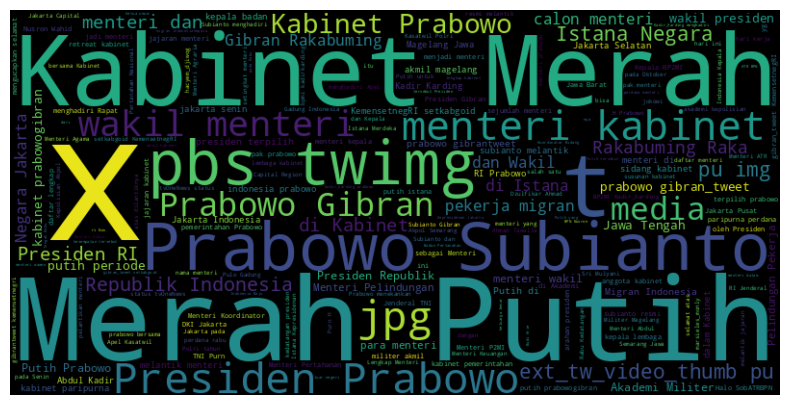

In [ ]:
# buat variabel baru untuk menyimpan teks yang digabungkan
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = ' '.join(data['full_text'].tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

wc = WordCloud(stopwords=stopwords, background_color='black', width=800, height=400)
# menghasilkan wordcloud dari teks yang digabungkan
wc.generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

# **Proses Data**

### **Text Cleaning**

In [ ]:
def remove_non_ascii(text):
    return ''.join(i for i in text if ord(i) < 128)

In [ ]:
def remove_urls(text):
    return re.sub(r'http\S+|www\.\S+', '', text)

In [ ]:
def remove_mentions(text):
    return re.sub(r'@\w+(?:_\w+)*\b', '', text)

In [ ]:
def remove_link(text):
    return ' '.join(re.sub('([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)','', text).split())

In [ ]:
def remove_hashtags(text):
    return re.sub(r'#\w+', '', text)

In [ ]:
def remove_hashtags(text):
    return re.sub(r'#\w+', '', text)

In [ ]:
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

In [ ]:
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [ ]:
def remove_emojis(text):
    return emoji.replace_emoji(text, replace='')

In [ ]:
def remove_single_characters(text):
    return ' '.join(word for word in text.split() if len(word) > 1)

In [ ]:
def to_lower(text):
    return text.lower()

In [ ]:
def clean_tweet(text):
    text = remove_non_ascii(text)
    text = remove_urls(text)
    text = remove_mentions(text)
    text = remove_link(text)
    text = remove_hashtags(text)
    text = remove_numbers(text)
    text = remove_punctuation(text)
    text = remove_emojis(text)
    text = remove_single_characters(text)
    text = to_lower(text)
    return text.strip()

In [ ]:
data['clean_tweet'] = data['full_text'].apply(clean_tweet)

# # Menyimpan hasil ke file baru
# data.to_csv('cleaned_tweets.csv', index=False)
# print("Data telah dibersihkan dan disimpan dalam 'cleaned_tweets.csv'")

In [ ]:
# data2 = pd.read_csv('/content/cleaned_tweets.csv')
# data2

In [ ]:
print(data['clean_tweet'])

0        profil dito ariotedjo menteri pemuda dan olahr...
1        hari kerja ahy teratas dalam deretan menteri d...
2        saksikan menit bersama kabinet merah putih uta...
3        presiden prabowo menginstruksikan kepada jajar...
4        presiden ri prabowo subianto meminta jajaran k...
                               ...                        
10248    menteri keuangan sri mulyani turut dipanggil o...
10249    presiden terpilih prabowo subianto memanggil s...
10250    para calon menteri akan diundang ke kediaman p...
10251    mantan istri basuki tjahaja purnama ahok veron...
10252    diskusi kabinet hanya prabowo dan sufmi dasco ...
Name: clean_tweet, Length: 10229, dtype: object


### **Casefolding**

In [ ]:
# Casefolding
def case_folding(text):
    if isinstance(text, str):
        lowercase_text = text.lower()
        return lowercase_text
    else:
        return text

data['case_folding'] = data['clean_tweet'].apply(case_folding)
data.head()

,created_at,favorite_count,full_text,clean_tweet,case_folding
0,Jan-24,04.59.00,"2025,0.0,Profil Dito Ariotedjo Menteri Pemuda ...",profil dito ariotedjo menteri pemuda dan olahr...,profil dito ariotedjo menteri pemuda dan olahr...
1,Jan-24,04.56.57,"2025,1.0,100 Hari Kerja AHY teratas dalam dere...",hari kerja ahy teratas dalam deretan menteri d...,hari kerja ahy teratas dalam deretan menteri d...
2,Jan-24,04.55.50,"2025,0.0,Saksikan 30 Menit Bersama Kabinet Mer...",saksikan menit bersama kabinet merah putih uta...,saksikan menit bersama kabinet merah putih uta...
3,Jan-24,04.53.19,"2025,0.0,Presiden Prabowo menginstruksikan kep...",presiden prabowo menginstruksikan kepada jajar...,presiden prabowo menginstruksikan kepada jajar...
4,Jan-24,04.34.37,"2025,0.0,Presiden RI Prabowo Subianto meminta ...",presiden ri prabowo subianto meminta jajaran k...,presiden ri prabowo subianto meminta jajaran k...


In [ ]:
print(data.columns)


Index(['created_at', 'favorite_count', 'full_text', 'clean_tweet',
       'case_folding'],
      dtype='object')


In [ ]:
print(data['case_folding'])

0        profil dito ariotedjo menteri pemuda dan olahr...
1        hari kerja ahy teratas dalam deretan menteri d...
2        saksikan menit bersama kabinet merah putih uta...
3        presiden prabowo menginstruksikan kepada jajar...
4        presiden ri prabowo subianto meminta jajaran k...
                               ...                        
10248    menteri keuangan sri mulyani turut dipanggil o...
10249    presiden terpilih prabowo subianto memanggil s...
10250    para calon menteri akan diundang ke kediaman p...
10251    mantan istri basuki tjahaja purnama ahok veron...
10252    diskusi kabinet hanya prabowo dan sufmi dasco ...
Name: case_folding, Length: 10229, dtype: object


### **Tokenization**

In [ ]:
nltk.download('punkt_tab')
def tokenize_text(text):
    return word_tokenize(text)

data['token'] = data['case_folding'].apply(tokenize_text)
data.head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,created_at,favorite_count,full_text,clean_tweet,case_folding,token
0,Jan-24,04.59.00,"2025,0.0,Profil Dito Ariotedjo Menteri Pemuda ...",profil dito ariotedjo menteri pemuda dan olahr...,profil dito ariotedjo menteri pemuda dan olahr...,"[profil, dito, ariotedjo, menteri, pemuda, dan..."
1,Jan-24,04.56.57,"2025,1.0,100 Hari Kerja AHY teratas dalam dere...",hari kerja ahy teratas dalam deretan menteri d...,hari kerja ahy teratas dalam deretan menteri d...,"[hari, kerja, ahy, teratas, dalam, deretan, me..."
2,Jan-24,04.55.50,"2025,0.0,Saksikan 30 Menit Bersama Kabinet Mer...",saksikan menit bersama kabinet merah putih uta...,saksikan menit bersama kabinet merah putih uta...,"[saksikan, menit, bersama, kabinet, merah, put..."
3,Jan-24,04.53.19,"2025,0.0,Presiden Prabowo menginstruksikan kep...",presiden prabowo menginstruksikan kepada jajar...,presiden prabowo menginstruksikan kepada jajar...,"[presiden, prabowo, menginstruksikan, kepada, ..."
4,Jan-24,04.34.37,"2025,0.0,Presiden RI Prabowo Subianto meminta ...",presiden ri prabowo subianto meminta jajaran k...,presiden ri prabowo subianto meminta jajaran k...,"[presiden, ri, prabowo, subianto, meminta, jaj..."


In [ ]:
print(data['token'])

0        [profil, dito, ariotedjo, menteri, pemuda, dan...
1        [hari, kerja, ahy, teratas, dalam, deretan, me...
2        [saksikan, menit, bersama, kabinet, merah, put...
3        [presiden, prabowo, menginstruksikan, kepada, ...
4        [presiden, ri, prabowo, subianto, meminta, jaj...
                               ...                        
10248    [menteri, keuangan, sri, mulyani, turut, dipan...
10249    [presiden, terpilih, prabowo, subianto, memang...
10250    [para, calon, menteri, akan, diundang, ke, ked...
10251    [mantan, istri, basuki, tjahaja, purnama, ahok...
10252    [diskusi, kabinet, hanya, prabowo, dan, sufmi,...
Name: token, Length: 10229, dtype: object


### **Normalization**

In [ ]:
spell_normalization = pd.read_excel('/content/Drive/MyDrive/kamuskatabaku.xlsx')
spell_normalization.head()


,tidak_baku,kata_baku
0,woww,wow
1,aminn,amin
2,met,selamat
3,netaas,menetas
4,keberpa,keberapa


In [ ]:
def change_word(words):
    list_word = []
    string_word = ""
    if type(words) == 'float':
        return list_word
    for word in words:
        if any(spell_normalization['tidak_baku'] == word):
            idx = spell_normalization.index[spell_normalization['tidak_baku'] == word]
            formal_word = spell_normalization['kata_baku'].iloc[idx].tolist()
            list_word.append(formal_word[0])
        else:
            list_word.append(word)
        string_word += word + " "
    print(f"{string_word} => {list_word}")
    print("\n")
    return np.nan if len(list_word) == 0 else list_word

tes = ['Wkwk', 'iya', 'nih', 'udah', 'sepaket', 'kayanya', 'sama', 'yahudin', 'org']
print(change_word(tes))
data['norm'] = data['token'].apply(change_word)
data.head()

Output streaming akan dipotong hingga 5000 baris terakhir.


hal itu disampaikan prabowo saat rapat terbatas ratas bersama dengan menteri koordinator bidang pangan zulkifli hasan terkait pembahasan isu strategis di sektor pangan pada selasa eharianjogjainyogyakarta indonesia prabowo rapat terbatas ratas bersama menteri koordinator bidang pangan zulkifli hasan terkait pembahasan isu strategis sektor pangan selasa  => ['hal', 'itu', 'disampaikan', 'prabowo', 'saat', 'rapat', 'terbatas', 'ratas', 'bersama', 'dengan', 'menteri', 'koordinator', 'bidang', 'pangan', 'zulkifli', 'hasan', 'terkait', 'pembahasan', 'isu', 'strategis', 'di', 'sektor', 'pangan', 'pada', 'selasa', 'eharianjogjainyogyakarta', 'indonesia', 'prabowo', 'rapat', 'terbatas', 'ratas', 'bersama', 'menteri', 'koordinator', 'bidang', 'pangan', 'zulkifli', 'hasan', 'terkait', 'pembahasan', 'isu', 'strategis', 'sektor', 'pangan', 'selasa']


menteri pu dody hanggodo dan wakil menteri pu diana kusumastuti menghadiri sidang kabin

,created_at,favorite_count,full_text,clean_tweet,case_folding,token,norm
0,Jan-24,04.59.00,"2025,0.0,Profil Dito Ariotedjo Menteri Pemuda ...",profil dito ariotedjo menteri pemuda dan olahr...,profil dito ariotedjo menteri pemuda dan olahr...,"[profil, dito, ariotedjo, menteri, pemuda, dan...","[profil, dito, ariotedjo, menteri, pemuda, dan..."
1,Jan-24,04.56.57,"2025,1.0,100 Hari Kerja AHY teratas dalam dere...",hari kerja ahy teratas dalam deretan menteri d...,hari kerja ahy teratas dalam deretan menteri d...,"[hari, kerja, ahy, teratas, dalam, deretan, me...","[hari, kerja, ahy, teratas, dalam, deretan, me..."
2,Jan-24,04.55.50,"2025,0.0,Saksikan 30 Menit Bersama Kabinet Mer...",saksikan menit bersama kabinet merah putih uta...,saksikan menit bersama kabinet merah putih uta...,"[saksikan, menit, bersama, kabinet, merah, put...","[saksikan, menit, bersama, kabinet, merah, put..."
3,Jan-24,04.53.19,"2025,0.0,Presiden Prabowo menginstruksikan kep...",presiden prabowo menginstruksikan kepada jajar...,presiden prabowo menginstruksikan kepada jajar...,"[presiden, prabowo, menginstruksikan, kepada, ...","[presiden, prabowo, menginstruksikan, kepada, ..."
4,Jan-24,04.34.37,"2025,0.0,Presiden RI Prabowo Subianto meminta ...",presiden ri prabowo subianto meminta jajaran k...,presiden ri prabowo subianto meminta jajaran k...,"[presiden, ri, prabowo, subianto, meminta, jaj...","[presiden, ri, prabowo, subianto, meminta, jaj..."


In [ ]:
print(data['norm'])

0        [profil, dito, ariotedjo, menteri, pemuda, dan...
1        [hari, kerja, ahy, teratas, dalam, deretan, me...
2        [saksikan, menit, bersama, kabinet, merah, put...
3        [presiden, prabowo, menginstruksikan, kepada, ...
4        [presiden, ri, prabowo, subianto, meminta, jaj...
                               ...                        
10248    [menteri, keuangan, sri, mulyani, turut, dipan...
10249    [presiden, terpilih, prabowo, subianto, memang...
10250    [para, calon, menteri, akan, diundang, ke, ked...
10251    [mantan, istri, basuki, tjahaja, purnama, ahok...
10252    [diskusi, kabinet, hanya, prabowo, dan, sufmi,...
Name: norm, Length: 10229, dtype: object


### **Stopwords**

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
print(stopwords)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [ ]:
def stopword_text(tokens):
    cleaned_tokens = []
    for token in tokens:
        if token not in stopwords or token in ['tidak', 'jangan', 'bukan', 'kurang', 'sangat', 'lebih', 'malah', 'hanya']:
            cleaned_tokens.append(token)
    return cleaned_tokens

data['stopwr'] = data['norm'].apply(lambda x: stopword_text(x))
data.head()

,created_at,favorite_count,full_text,clean_tweet,case_folding,token,norm,stopwr
0,Jan-24,04.59.00,"2025,0.0,Profil Dito Ariotedjo Menteri Pemuda ...",profil dito ariotedjo menteri pemuda dan olahr...,profil dito ariotedjo menteri pemuda dan olahr...,"[profil, dito, ariotedjo, menteri, pemuda, dan...","[profil, dito, ariotedjo, menteri, pemuda, dan...","[profil, dito, ariotedjo, menteri, pemuda, ola..."
1,Jan-24,04.56.57,"2025,1.0,100 Hari Kerja AHY teratas dalam dere...",hari kerja ahy teratas dalam deretan menteri d...,hari kerja ahy teratas dalam deretan menteri d...,"[hari, kerja, ahy, teratas, dalam, deretan, me...","[hari, kerja, ahy, teratas, dalam, deretan, me...","[hari, kerja, ahy, teratas, deretan, menteri, ..."
2,Jan-24,04.55.50,"2025,0.0,Saksikan 30 Menit Bersama Kabinet Mer...",saksikan menit bersama kabinet merah putih uta...,saksikan menit bersama kabinet merah putih uta...,"[saksikan, menit, bersama, kabinet, merah, put...","[saksikan, menit, bersama, kabinet, merah, put...","[saksikan, menit, bersama, kabinet, merah, put..."
3,Jan-24,04.53.19,"2025,0.0,Presiden Prabowo menginstruksikan kep...",presiden prabowo menginstruksikan kepada jajar...,presiden prabowo menginstruksikan kepada jajar...,"[presiden, prabowo, menginstruksikan, kepada, ...","[presiden, prabowo, menginstruksikan, kepada, ...","[presiden, prabowo, menginstruksikan, jajaran,..."
4,Jan-24,04.34.37,"2025,0.0,Presiden RI Prabowo Subianto meminta ...",presiden ri prabowo subianto meminta jajaran k...,presiden ri prabowo subianto meminta jajaran k...,"[presiden, ri, prabowo, subianto, meminta, jaj...","[presiden, ri, prabowo, subianto, meminta, jaj...","[presiden, ri, prabowo, subianto, meminta, jaj..."


In [ ]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('indonesian')) # Ganti 'english' dengan 'indonesian' atau bahasa lain yang sesuai
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return " ".join(filtered_text)

### **Steaming**

In [ ]:
!pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 37.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16505 sha256=8e166069daf7492755ba7cf9301cdbb41de95f40a93dc39afc94752cf3d1359d
  Stored in directory: /root/.cache/pip/wheels/ef/7f/bd/9bed48f078f3ee1fa75e0b29b6e0335ce1cb03a38d3443b3a3
Successfully built swifter


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

data['stem'] = data['stopwr'].swifter.apply(stem_text)
data.head()

Pandas Apply:   0%|          | 0/10229 [00:00<?, ?it/s]

,created_at,favorite_count,full_text,clean_tweet,case_folding,token,norm,stopwr,stem
0,Jan-24,04.59.00,"2025,0.0,Profil Dito Ariotedjo Menteri Pemuda ...",profil dito ariotedjo menteri pemuda dan olahr...,profil dito ariotedjo menteri pemuda dan olahr...,"[profil, dito, ariotedjo, menteri, pemuda, dan...","[profil, dito, ariotedjo, menteri, pemuda, dan...","[profil, dito, ariotedjo, menteri, pemuda, ola...","[profil, dito, ariotedjo, menteri, pemuda, ola..."
1,Jan-24,04.56.57,"2025,1.0,100 Hari Kerja AHY teratas dalam dere...",hari kerja ahy teratas dalam deretan menteri d...,hari kerja ahy teratas dalam deretan menteri d...,"[hari, kerja, ahy, teratas, dalam, deretan, me...","[hari, kerja, ahy, teratas, dalam, deretan, me...","[hari, kerja, ahy, teratas, deretan, menteri, ...","[hari, kerja, ahy, atas, deret, menteri, citra..."
2,Jan-24,04.55.50,"2025,0.0,Saksikan 30 Menit Bersama Kabinet Mer...",saksikan menit bersama kabinet merah putih uta...,saksikan menit bersama kabinet merah putih uta...,"[saksikan, menit, bersama, kabinet, merah, put...","[saksikan, menit, bersama, kabinet, merah, put...","[saksikan, menit, bersama, kabinet, merah, put...","[saksi, menit, sama, kabinet, merah, putih, ut..."
3,Jan-24,04.53.19,"2025,0.0,Presiden Prabowo menginstruksikan kep...",presiden prabowo menginstruksikan kepada jajar...,presiden prabowo menginstruksikan kepada jajar...,"[presiden, prabowo, menginstruksikan, kepada, ...","[presiden, prabowo, menginstruksikan, kepada, ...","[presiden, prabowo, menginstruksikan, jajaran,...","[presiden, prabowo, instruksi, jajar, kabinet,..."
4,Jan-24,04.34.37,"2025,0.0,Presiden RI Prabowo Subianto meminta ...",presiden ri prabowo subianto meminta jajaran k...,presiden ri prabowo subianto meminta jajaran k...,"[presiden, ri, prabowo, subianto, meminta, jaj...","[presiden, ri, prabowo, subianto, meminta, jaj...","[presiden, ri, prabowo, subianto, meminta, jaj...","[presiden, ri, prabowo, subianto, minta, jajar..."


In [ ]:
print(data['stem'])

0        [profil, dito, ariotedjo, menteri, pemuda, ola...
1        [hari, kerja, ahy, atas, deret, menteri, citra...
2        [saksi, menit, sama, kabinet, merah, putih, ut...
3        [presiden, prabowo, instruksi, jajar, kabinet,...
4        [presiden, ri, prabowo, subianto, minta, jajar...
                               ...                        
10248    [menteri, uang, sri, mulyani, turut, panggil, ...
10249    [presiden, pilih, prabowo, subianto, panggil, ...
10250    [calon, menteri, undang, diam, prabowo, hambal...
10251    [mantan, istri, basuki, tjahaja, purnama, ahok...
10252    [diskusi, kabinet, hanya, prabowo, sufmi, dasc...
Name: stem, Length: 10229, dtype: object


In [ ]:
def preprocessing(text):
  text = ' '.join(text)
  text = clean_tweet(text)
  text = case_folding(text)
  text = tokenize_text(text)
  text = change_word(text)
  text = stopword_text(text)
  text = stem_text(text)
  #tolong buatkan kode untuk menjoin hasil dari text di atas sebelum di return
  preprocessed_text = ' '.join(text)
  return preprocessed_text

In [ ]:
# Terapkan praproses ke kolom 'full_text'
data['preprocessed_text'] = data['stem'].apply(preprocessing)

# Simpan DataFrame dengan teks yang telah diproses sebelumnya ke file CSV baru
data.to_csv('/content/drive/MyDrive/File_TA_Fiks/dataclear.csv', index=False)
print("Data telah di-preprocessing dan disimpan dalam 'dataclear.csv'")

profil dito ariotedjo menteri pemuda olahraga kabinet merah putih jakarta indonesia dito ariotedjo menteri pemuda olahraga kabinet merah putih bahlillahadalia kuningkeren golkarindonesia partaigolkar golkarpedia  => ['profil', 'dito', 'ariotedjo', 'menteri', 'pemuda', 'olahraga', 'kabinet', 'merah', 'putih', 'jakarta', 'indonesia', 'dito', 'ariotedjo', 'menteri', 'pemuda', 'olahraga', 'kabinet', 'merah', 'putih', 'bahlillahadalia', 'kuningkeren', 'golkarindonesia', 'partaigolkar', 'golkarpedia']


hari kerja ahy atas deret menteri citra mentereng positif kabinet merah putih ahy teddy indra wijaya mayor teddy sri mulyani sumber tajuk nasional sumatra indonesia kerja ahy atas deret menteri citra mentereng positif kabinet merah putih ahy teddy indra wijaya mayor teddy sri mulyani sumber tajuk nasional kabinetmerahputih citrapositif  => ['hari', 'kerja', 'ahy', 'atas', 'deret', 'menteri', 'citra', 'mentereng', 'positif', 'kabinet', 'merah', 'putih', 'ahy', 'teddy', 'indra', 'wijaya', 'mayo

KeyboardInterrupt: 

In [ ]:
# def preprocessing(text):
#   text = clean_tweet(text)
#   text = case_folding(text)
#   text = tokenize_text(text)
#   text = change_word(text)
#   text = stopword_text(text)
#   text = stem_text(text)
#   # Gabungkan hasil sebelum kembali
#   if isinstance(text, list):
#     preprocessed_text = ' '.join(text)
#   else:
#     preprocessed_text = text # Menangani kasus di mana teks bukan merupakan daftar (misalnya, setelah change_word)
#   return preprocessed_text

# # Terapkan praproses ke kolom 'full_text'
# data['preprocessed_text'] = data['full_text'].apply(preprocessing)

# # Simpan DataFrame dengan teks yang telah diproses sebelumnya ke file CSV baru
# data.to_csv('datalabel.csv', index=False)
# print("Data telah di-preprocessing dan disimpan dalam 'datalabel.csv'")
